# Equivalent layer technique for estimating total magnetization direction using airborne survey

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_prism.pickle') as f:
        model_prism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (40,20)
Number of data: 800.0
dx: 307.7 m
dy: 631.6 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_prism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 40.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_prism['m_R']
print 'Inclination: %.1f degree' % model_prism['inc_R']
print 'Declination: %.1f degree' % model_prism['dec_R']

Intensity: 5.0 A/m
Inclination: 55.0 degree
Declination: 30.0 degree


In [16]:
inc_R,dec_R = model_prism['inc_R'],model_prism['dec_R']

## Generating the layer with my function 

In [17]:
h = 620.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-5
eps_i = 1e-5

In [25]:
mu_pos = 1e5

In [26]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_obs_prism_RM_airb'],airborne['x'],airborne['y'],
    airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
    it_marq,eps_e,eps_i,mu_pos)

i = 0
1.31672752013e-13
0.159736011289 -3.83335036178
0.286725351259
i = 1
1.37097052017e-13
8.19983516007 -0.500101686105
0.453662838275
i = 2
1.43699139298e-13
13.4039720901 1.59529404824
0.335102463256
i = 3
1.49891026941e-13
17.1385231949 3.21530499588
0.249610420043
i = 4
1.5527968391e-13
19.9377960752 4.54588247437
0.188874208521
i = 5
1.5979404034e-13
22.1530421083 5.63878983114
0.150220355542
i = 6
1.63577849659e-13
23.9854908969 6.58384460871
0.125831471635
i = 7
1.66836990977e-13
25.5481376976 7.42754543938
0.109451730544
i = 8
1.69698960368e-13
26.9006798848 8.19083315854
0.096323238071
i = 9
1.72229855075e-13
28.0824377711 8.86849746759
0.0859960843136
i = 10
1.74466756155e-13
29.1297731331 9.4866504093
0.0768538799536
i = 11
1.76470418678e-13
30.0649358421 10.0517381984
0.068856614522
i = 12
1.78272746017e-13
30.9114069929 10.582727514
0.0629411913976
i = 13
1.79916451282e-13
31.6828043891 11.0822558847
0.0578566938499
i = 14
1.81422003756e-13
32.3894349371 11.5507144055
0

48.5679198174 24.3199933342
0.00151178483527
i = 120
2.1333254569e-13
48.6153607375 24.3553086731
0.00148095345827
i = 121
2.13417392466e-13
48.6622796857 24.3901678476
0.00145090076116
i = 122
2.13501300644e-13
48.7086881744 24.4245789399
0.00142172815893
i = 123
2.13584291787e-13
48.7545950651 24.4585495152
0.00139327116328
i = 124
2.13666382386e-13
48.8000091055 24.4920876119
0.00136552067469
i = 125
2.13747588574e-13
48.8449388264 24.5252010733
0.00133845578321
i = 126
2.13827926074e-13
48.8893925489 24.5578975539
0.00131205628887
i = 127
2.13907410204e-13
48.9333784352 24.5901850952
0.00128630860325
i = 128
2.13986055862e-13
48.9769045103 24.6220729366
0.00126120520345
i = 129
2.14063877388e-13
49.0199787237 24.6535685674
0.00123672456466
i = 130
2.14140889317e-13
49.0626086698 24.6846789227
0.00121283711795
i = 131
2.14217105585e-13
49.1048018 24.7154109856
0.0011895289045
i = 132
2.14292539811e-13
49.1465657811 24.7457725083
0.00116680898269
i = 133
2.14367205842e-13
49.18790758

51.9656494904 26.6541066077
0.000224128535991
i = 236
2.19415469609e-13
51.9835780481 26.665328331
0.000221109051494
i = 237
2.19447681628e-13
52.0013868235 26.6764614424
0.000218137057758
i = 238
2.19479680869e-13
52.0190769422 26.6875069148
0.0002152124655
i = 239
2.19511469319e-13
52.0366495152 26.6984657074
0.000212334379548
i = 240
2.19543048934e-13
52.0541056387 26.7093387658
0.000209501924456
i = 241
2.19574421646e-13
52.0714463945 26.7201270221
0.00020671424399
i = 242
2.19605589363e-13
52.0886731036 26.7308312533
0.000203976022286
i = 243
2.19636554502e-13
52.1057871365 26.741452185
0.000201287701959
i = 244
2.1966731959e-13
52.1227895218 26.7519907135
0.000198641278668
i = 245
2.19697886437e-13
52.1396812752 26.7624477228
0.000196035981021
i = 246
2.19728256831e-13
52.1564633995 26.7728240846
0.000193471054166
i = 247
2.19758432535e-13
52.1731368846 26.7831206587
0.000190945759397
i = 248
2.1978841529e-13
52.1897027081 26.7933382931
0.000188459373746
i = 249
2.19818206816e-13

53.4297619308 27.5653895928
5.25318708013e-05
i = 351
2.22043354106e-13
53.4384127586 27.5715078019
5.1913217423e-05
i = 352
2.22058645817e-13
53.4470109778 27.5776082115
5.13026867679e-05
i = 353
2.22073838512e-13
53.4555568345 27.5836913676
5.06992466533e-05
i = 354
2.22088932521e-13
53.4640506768 27.5897576461
5.01037124543e-05
i = 355
2.22103928423e-13
53.4724929281 27.595807039
4.95163831851e-05
i = 356
2.22118827058e-13
53.4808839626 27.6018395675
4.89366983395e-05
i = 357
2.22133629158e-13
53.4892241508 27.6078552532
4.83645462637e-05
i = 358
2.2214833545e-13
53.4975138604 27.6138541172
4.77998171418e-05
i = 359
2.22162946654e-13
53.5057534555 27.619836181
4.72424029525e-05
i = 360
2.22177463482e-13
53.5139432969 27.625801466
4.66921974431e-05
i = 361
2.22191886643e-13
53.5220837424 27.6317499937
4.61490960931e-05
i = 362
2.22206216837e-13
53.5301751465 27.6376817855
4.56129960863e-05
i = 363
2.22220454758e-13
53.5382178607 27.6435968629
4.50837962755e-05
i = 364
2.22234601096e-

54.1355950942 28.1833515899
1.26146625623e-05
i = 466
2.23254368047e-13
54.1396610041 28.1878115149
1.24547717803e-05
i = 467
2.23261062036e-13
54.1436999231 28.1922515192
1.22970104292e-05
i = 468
2.23267708443e-13
54.1477120471 28.196671674
1.21413483147e-05
i = 469
2.23274307636e-13
54.1516975703 28.2010720506
1.19877557014e-05
i = 470
2.23280859981e-13
54.1556566854 28.20545272
1.18362033116e-05
i = 471
2.23287365841e-13
54.1595895836 28.2098137534
1.16866623114e-05
i = 472
2.23293825574e-13
54.1634964544 28.2141552215
1.15391043063e-05
i = 473
2.23300239538e-13
54.1673774857 28.2184771953
1.13935013339e-05
i = 474
2.23306608085e-13
54.1712328642 28.2227797455
1.1249825853e-05
i = 475
2.23312931566e-13
54.1750627747 28.2270629426
1.11080507437e-05
i = 476
2.23319210327e-13
54.1788674007 28.2313268571
1.09681492924e-05
i = 477
2.23325444714e-13
54.1826469242 28.2355715596
1.08300951935e-05
i = 478
2.23331635067e-13
54.1864015257 28.2397971202
1.06938625354e-05
i = 479
2.23337781725e

### Visualization of the convergence

In [27]:
phi = (np.array(phi)/airborne['x'].size)

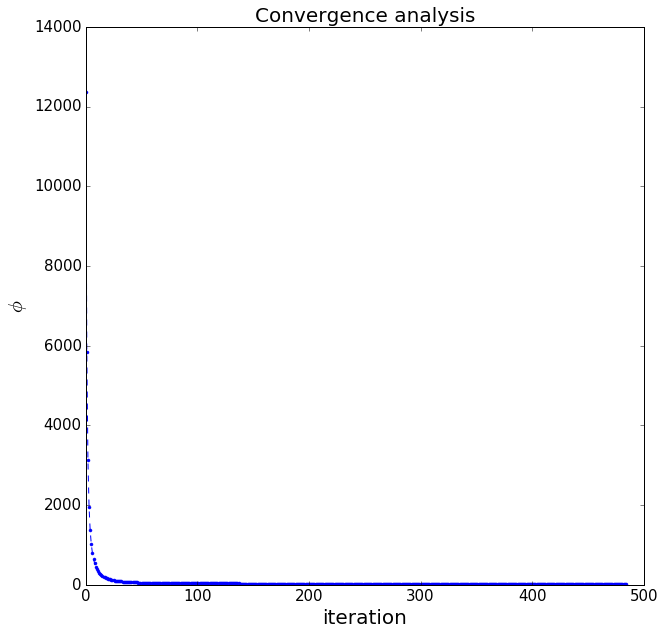

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\phi$', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/convergence_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetization direction

In [29]:
print (inc_est,dec_est)

(54.204787717509717, 28.260679854410615)


In [30]:
print (inc_R,dec_R)

(55.0, 30.0)


### Comparison between observed data and predicted data

In [31]:
pred = fc.tfa_layer(airborne['x'],airborne['y'],airborne['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [32]:
res = pred - data['tfa_obs_prism_RM_airb']

In [33]:
r_norm,r_mean,r_std = fc.residual(data['tfa_obs_prism_RM_airb'],pred)

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


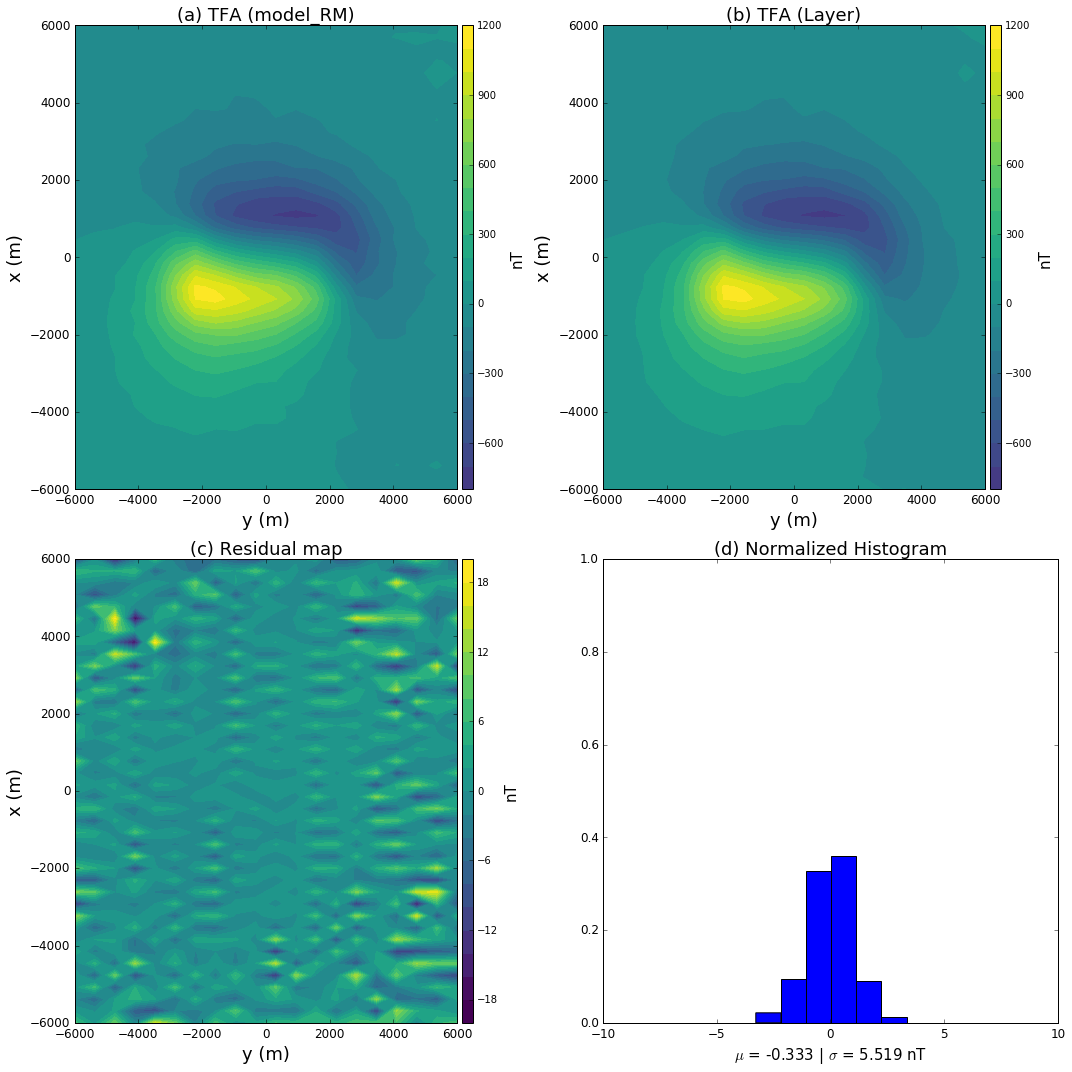

In [34]:
title_font = 18
bottom_font = 15
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(15,15), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_obs_prism_RM_airb'].max(), 
                                   data['tfa_obs_prism_RM_airb'].min(),
                                   pred.max(), pred.min()]).max()
res_ranges = np.max(np.abs(res))

plt.subplot(2,2,1)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']), 
             data['tfa_obs_prism_RM_airb'].reshape(airborne['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) TFA (model_RM)',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,2)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']),
             pred.reshape(airborne['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (Layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,3)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']),
             res.reshape(airborne['shape']), 
             20, cmap='viridis',  vmin=-res_ranges, vmax=res_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/airborne/data_fitting_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetic moment within the layer

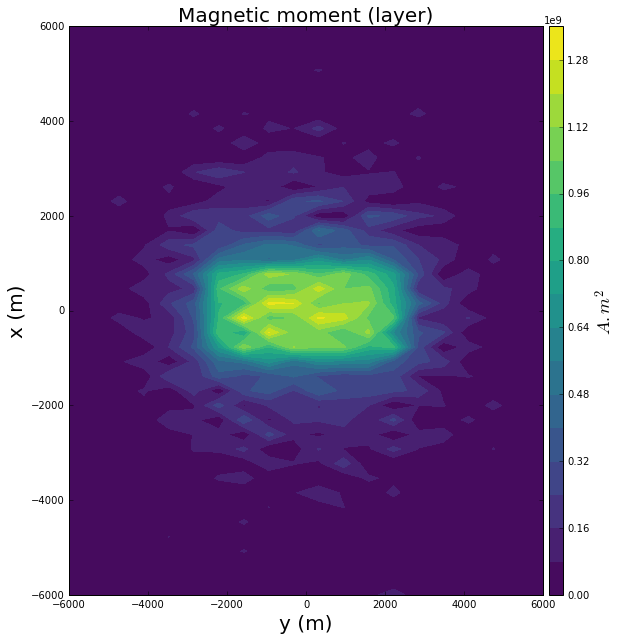

In [35]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(ys.reshape(shape_layer),xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer), 20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)

file_name = 'figs/airborne/magnetic_moment_positive_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Reduction to the pole

In [36]:
G_rtp = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [37]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

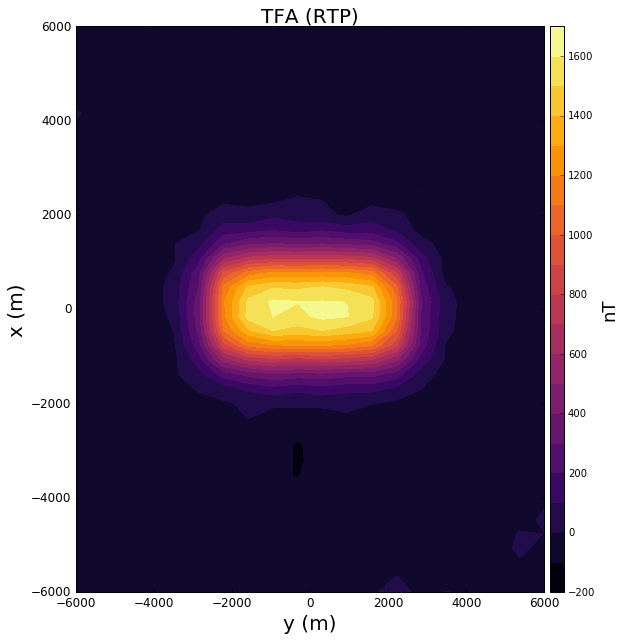

In [38]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(airborne['y'].reshape(airborne['shape']), 
             airborne['x'].reshape(airborne['shape']),
             tfa_rtp.reshape(airborne['shape']), 
             20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/airborne/RTP_airborne_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

# Visualization of the RTP and Magnetic moment over the layer

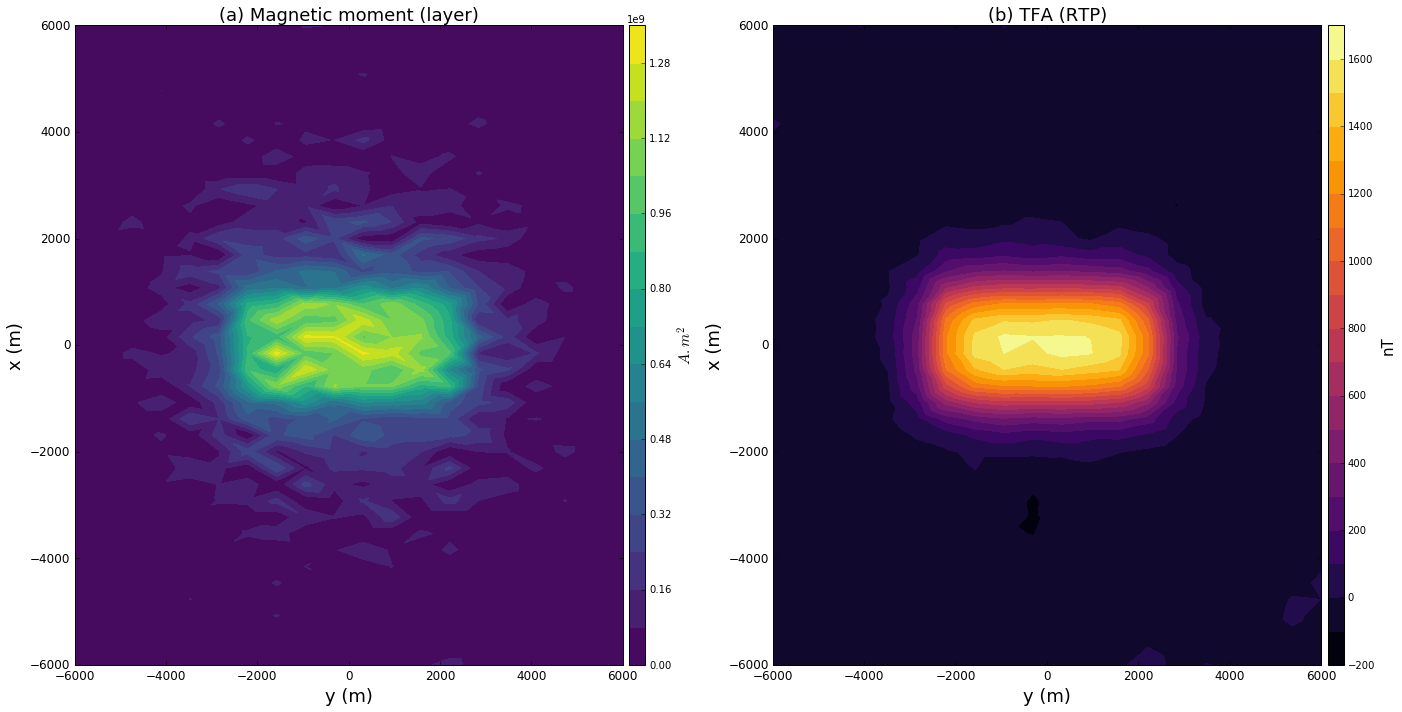

In [39]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(ys,xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) Magnetic moment (layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,2,2)
plt.tricontourf(airborne['y'],airborne['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/airborne/RTP_moment_LM_NNLS_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Comparison between the RTP Calculated by equivalent layer and the true RTP field

In [40]:
r_rtp = tfa_rtp - data['tfa_obs_prism_PL_airb']

In [41]:
r_norm,r_mean,r_std = fc.residual(tfa_rtp,data['tfa_obs_prism_PL_airb'])

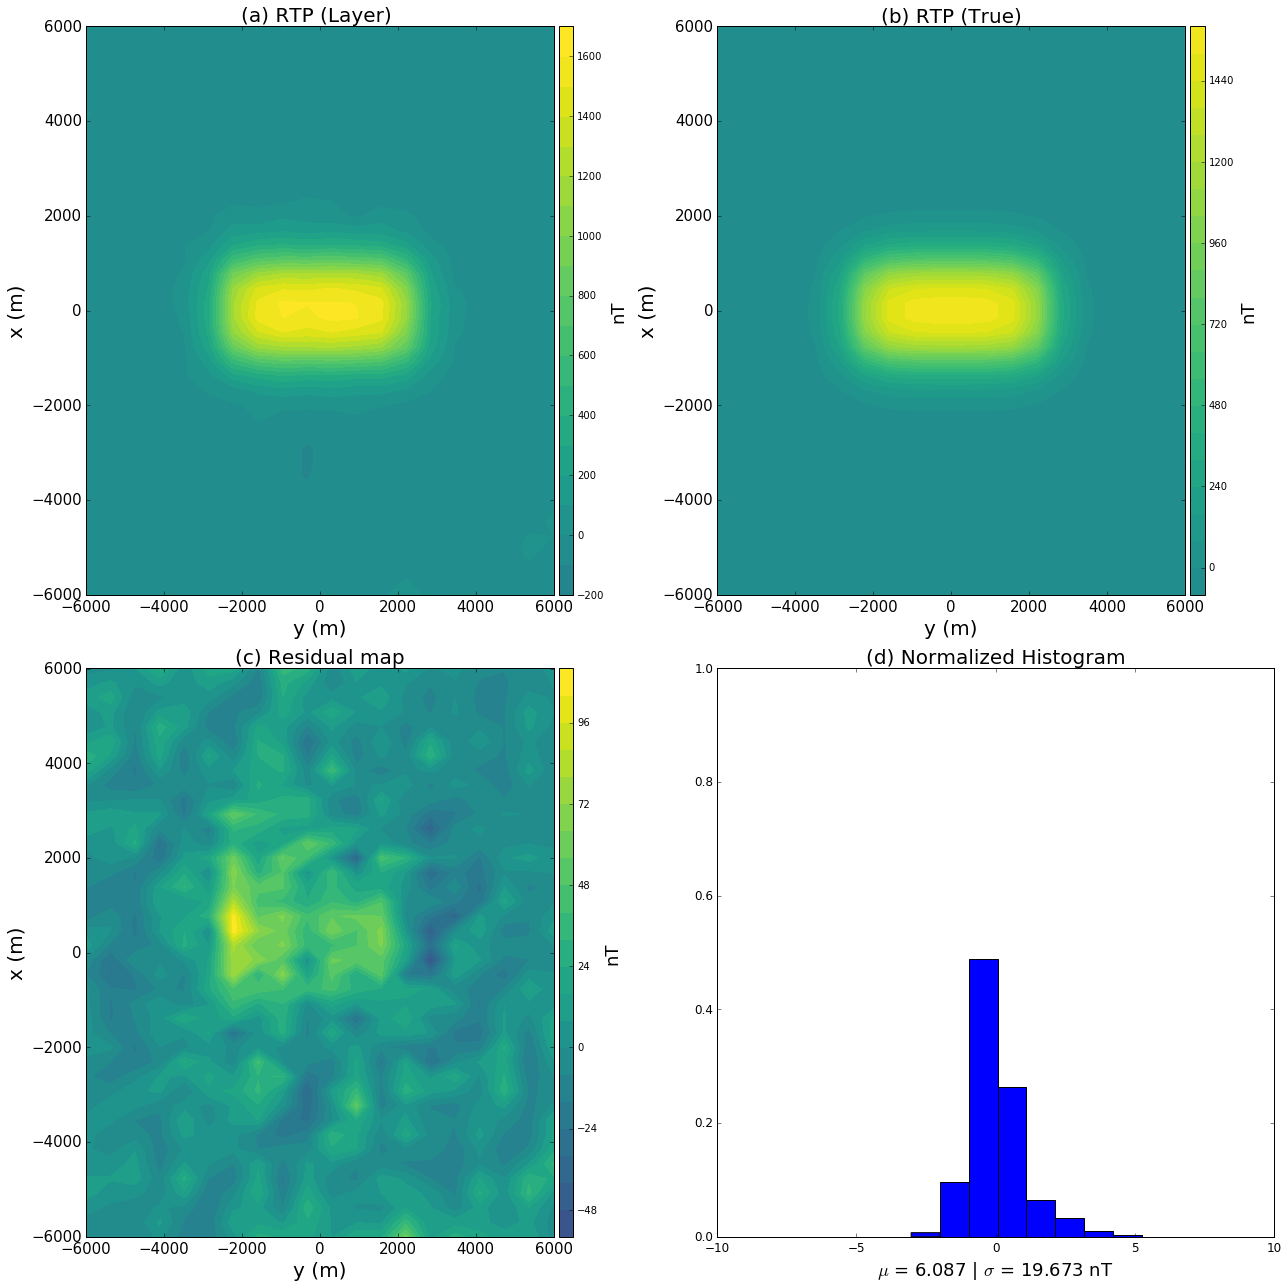

In [42]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([tfa_rtp.max(), tfa_rtp.min(),
                                   data['tfa_obs_prism_PL_airb'].max(), data['tfa_obs_prism_PL_airb'].min()]).max()

r_ranges = saturation_factor*np.abs([r_rtp.max(), r_rtp.min()]).max()


plt.subplot(2,2,1)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']), 
             tfa_rtp.reshape(airborne['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font) 
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) RTP (Layer) ', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']),
             data['tfa_obs_prism_PL_airb'].reshape(airborne['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) RTP (True)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.contourf(airborne['y'].reshape(airborne['shape']),
             airborne['x'].reshape(airborne['shape']),
             r_rtp.reshape(airborne['shape']), 
             20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/airborne/rtp_layer_true'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Results

In [43]:
result_RM_airb['magnetic_moment'] = m_LM
result_RM_airb['inc_est'] = inc_est
result_RM_airb['dec_est'] = dec_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_patameter'] = mu_pos
result_RM_airb['RTP'] = tfa_rtp
result_RM_airb['tfa_predicted'] = pred

#### Generating .pickle file

In [44]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [45]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)


### Saved files

In [46]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/convergence_LM_NNLS_magRM.png
2  figs/airborne/convergence_LM_NNLS_magRM.eps
3  figs/airborne/data_fitting_LM_NNLS_magRM.png
4  figs/airborne/data_fitting_LM_NNLS_magRM.eps
5  figs/airborne/magnetic_moment_positive_LM_NNLS_magRM.png
6  figs/airborne/magnetic_moment_positive_LM_NNLS_magRM.eps
7  figs/airborne/RTP_airborne_magRM.png
8  figs/airborne/RTP_airborne_magRM.eps
9  figs/airborne/RTP_moment_LM_NNLS_RM.png
10  figs/airborne/RTP_moment_LM_NNLS_RM.eps
11  figs/airborne/rtp_layer_true.png
12  figs/airborne/rtp_layer_true.eps
13  data/result_RM_airb.pickle
